In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns

In [39]:
import csv

txt_file = r"../dataset/mediaeval-2015-testset.txt"
csv_file = r"../dataset/mediaeval-2015-testset.csv"

# 使用 UTF-8 编码读取和写入文件，处理潜在的编码问题
with open(txt_file, "r", encoding="utf-8") as infile, \
     open(csv_file, "w", newline='', encoding="utf-8") as outfile:

    in_txt = csv.reader(infile, delimiter='\t')  # 读取 TXT 文件
    out_csv = csv.writer(outfile)  # 准备写入 CSV 文件

    out_csv.writerows(in_txt)  # 将数据写入 CSV 文件


In [40]:
txt_file = r"../dataset/mediaeval-2015-trainingset.txt"
csv_file = r"../dataset/mediaeval-2015-trainingset.csv"

# 使用 UTF-8 编码读取和写入文件，处理潜在的编码问题
with open(txt_file, "r", encoding="utf-8") as infile, \
     open(csv_file, "w", newline='', encoding="utf-8") as outfile:

    in_txt = csv.reader(infile, delimiter='\t')  # 读取 TXT 文件
    out_csv = csv.writer(outfile)  # 准备写入 CSV 文件

    out_csv.writerows(in_txt)  # 将数据写入 CSV 文件

In [41]:
def load_tweets_data(name): 
    csv_path = os.path.join("", name) 
    return pd.read_csv(csv_path)

In [42]:
trainTweets = load_tweets_data("../dataset/mediaeval-2015-trainingset.csv")
testTweets = load_tweets_data("../dataset/mediaeval-2015-testset.csv")

In [43]:
trainTweets.shape

(14277, 7)

In [44]:
testTweets.shape

(3755, 7)

In [45]:
trainTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14277 non-null  int64 
 1   tweetText   14277 non-null  object
 2   userId      14277 non-null  int64 
 3   imageId(s)  14277 non-null  object
 4   username    14277 non-null  object
 5   timestamp   14277 non-null  object
 6   label       14277 non-null  object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


In [46]:
trainTweets.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


In [47]:
trainTweets.drop(["timestamp"],axis=1,inplace=True)
trainTweets.drop(["tweetId"],axis=1,inplace=True)
trainTweets.drop(["userId"],axis=1,inplace=True)
trainTweets.drop(["username"],axis=1,inplace=True)

In [48]:
trainTweets.head()

,tweetText,imageId(s),label
0,¿Se acuerdan de la película: “El día después d...,sandyA_fake_46,fake
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,sandyA_fake_09,fake
2,"Buena la foto del Huracán Sandy, me recuerda a...",sandyA_fake_09,fake
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,sandyA_fake_29,fake
4,My fave place in the world #nyc #hurricane #sa...,sandyA_fake_15,fake


In [49]:
trainTweets['tweetText'] = trainTweets['tweetText'].apply(lambda x: x.lower())
trainTweets.head()

,tweetText,imageId(s),label
0,¿se acuerdan de la película: “el día después d...,sandyA_fake_46,fake
1,@milenagimon: miren a sandy en ny! tremenda i...,sandyA_fake_09,fake
2,"buena la foto del huracán sandy, me recuerda a...",sandyA_fake_09,fake
3,scary shit #hurricane #ny http://t.co/e4jlbufh,sandyA_fake_29,fake
4,my fave place in the world #nyc #hurricane #sa...,sandyA_fake_15,fake


In [50]:
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

trainTweets['tweetText'] = trainTweets['tweetText'].apply(punctuation_removal)
trainTweets.head()

,tweetText,imageId(s),label
0,¿se acuerdan de la película “el día después de...,sandyA_fake_46,fake
1,milenagimon miren a sandy en ny tremenda imag...,sandyA_fake_09,fake
2,buena la foto del huracán sandy me recuerda a ...,sandyA_fake_09,fake
3,scary shit hurricane ny httptcoe4jlbufh,sandyA_fake_29,fake
4,my fave place in the world nyc hurricane sandy...,sandyA_fake_15,fake


In [51]:
nltk.download('stopwords')
stop = stopwords.words('english')

trainTweets['tweetText'] = trainTweets['tweetText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\87186\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
trainTweets.head()

,tweetText,imageId(s),label
0,¿se acuerdan de la película “el día después de...,sandyA_fake_46,fake
1,milenagimon miren sandy en ny tremenda imagen ...,sandyA_fake_09,fake
2,buena la foto del huracán sandy recuerda la pe...,sandyA_fake_09,fake
3,scary shit hurricane ny httptcoe4jlbufh,sandyA_fake_29,fake
4,fave place world nyc hurricane sandy statueofl...,sandyA_fake_15,fake


In [53]:
trainTweets.loc[trainTweets['label'] == 'humor', 'label'] = 'fake'

In [54]:
print(trainTweets["imageId(s)"].iloc[0])

sandyA_fake_46


In [55]:
# Generate topics
topics = [] 
for value in trainTweets["imageId(s)"]: 
    topics.append(str(value).split("_")[0])
                  
trainTweets["topic"] = topics    
trainTweets.head()

,tweetText,imageId(s),label,topic
0,¿se acuerdan de la película “el día después de...,sandyA_fake_46,fake,sandyA
1,milenagimon miren sandy en ny tremenda imagen ...,sandyA_fake_09,fake,sandyA
2,buena la foto del huracán sandy recuerda la pe...,sandyA_fake_09,fake,sandyA
3,scary shit hurricane ny httptcoe4jlbufh,sandyA_fake_29,fake,sandyA
4,fave place world nyc hurricane sandy statueofl...,sandyA_fake_15,fake,sandyA


In [56]:
trainTweets['label'].value_counts()

label
fake    9356
real    4921
Name: count, dtype: int64

In [57]:
topics = trainTweets.topic.unique()
print(topics)

['sandyA' 'sandyB' 'boston' 'columbianChemicals' 'bringback' 'passport'
 'underwater' 'elephant' 'sochi' 'malaysia' 'livr' 'pigFish']


label
fake    9356
real    4921
Name: tweetText, dtype: int64


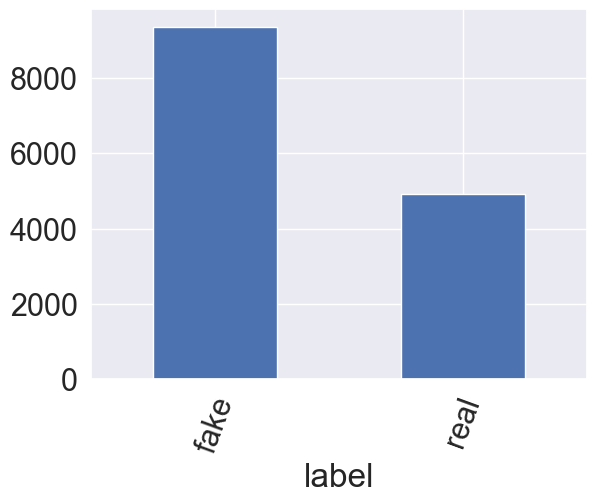

In [58]:
print(trainTweets.groupby(['label'])['tweetText'].count())
trainTweets.groupby(['label'])['tweetText'].count().plot(kind='bar')
plt.xticks(rotation=70)
plt.show()

In [59]:
event_words = ['sandy', 'hurricane', 'hurricanesandy', 'new', 'nyc', 'ny', 'york', 'statue', 'statueofliberty', 
                   'shark', 'newyork', 'tomb', 'sochi', 'soldier', 'liberty', 'jersey', 'nj', 'mh370', 'huracán', 
                   'boston', 'manhattan', 'bringbackourgirls', 'columbianchemicals', 'flooding', 'flood', 'cuba']
en_stop_words = nltk.corpus.stopwords.words('english')
sp_stop_words = nltk.corpus.stopwords.words('spanish')
twitter = ['rt']

block_words = en_stop_words + sp_stop_words + event_words + twitter

In [60]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Custom Colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

def generate_word_cloud(input_tweets):
    tweets = input_tweets
    tweets_text = " ".join(tweets.tweetText.to_numpy().tolist())
    
    # wordcloud of ham messages
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='White', colormap=cmap, collocations=False, stopwords = block_words).generate(tweets_text)
    plt.figure(figsize=(16,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # turn off axis
    plt.show()
    wordcloud.to_file("real.png")

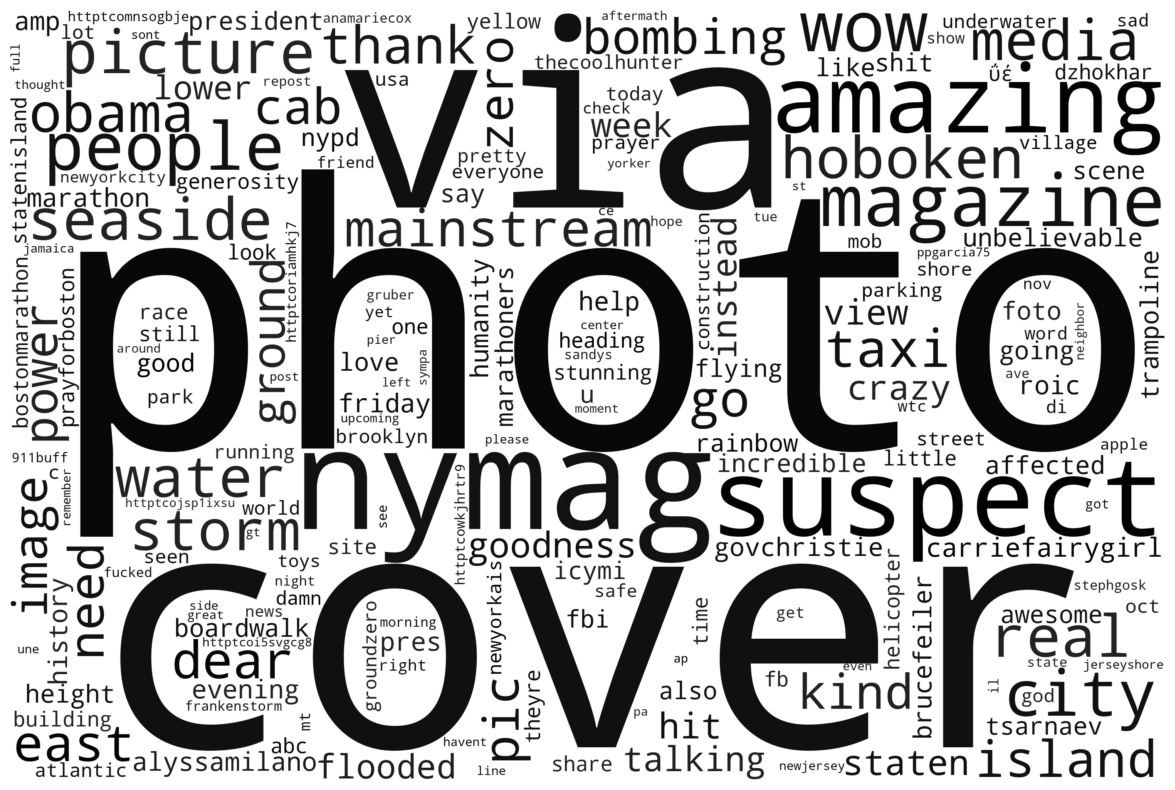

In [61]:
generate_word_cloud(trainTweets[trainTweets['label'] == 'real'])

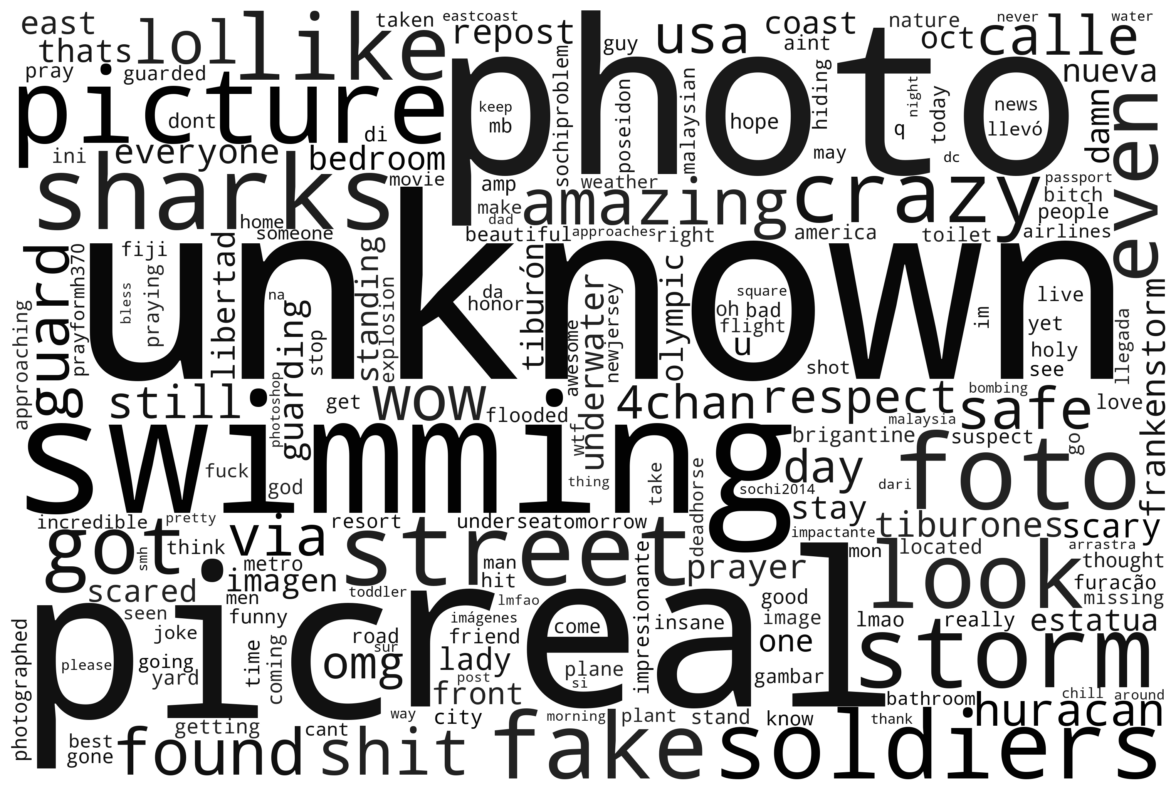

In [62]:
generate_word_cloud(trainTweets[trainTweets['label'] == 'fake'])

In [63]:
sns.set_theme(style="ticks", color_codes=True)

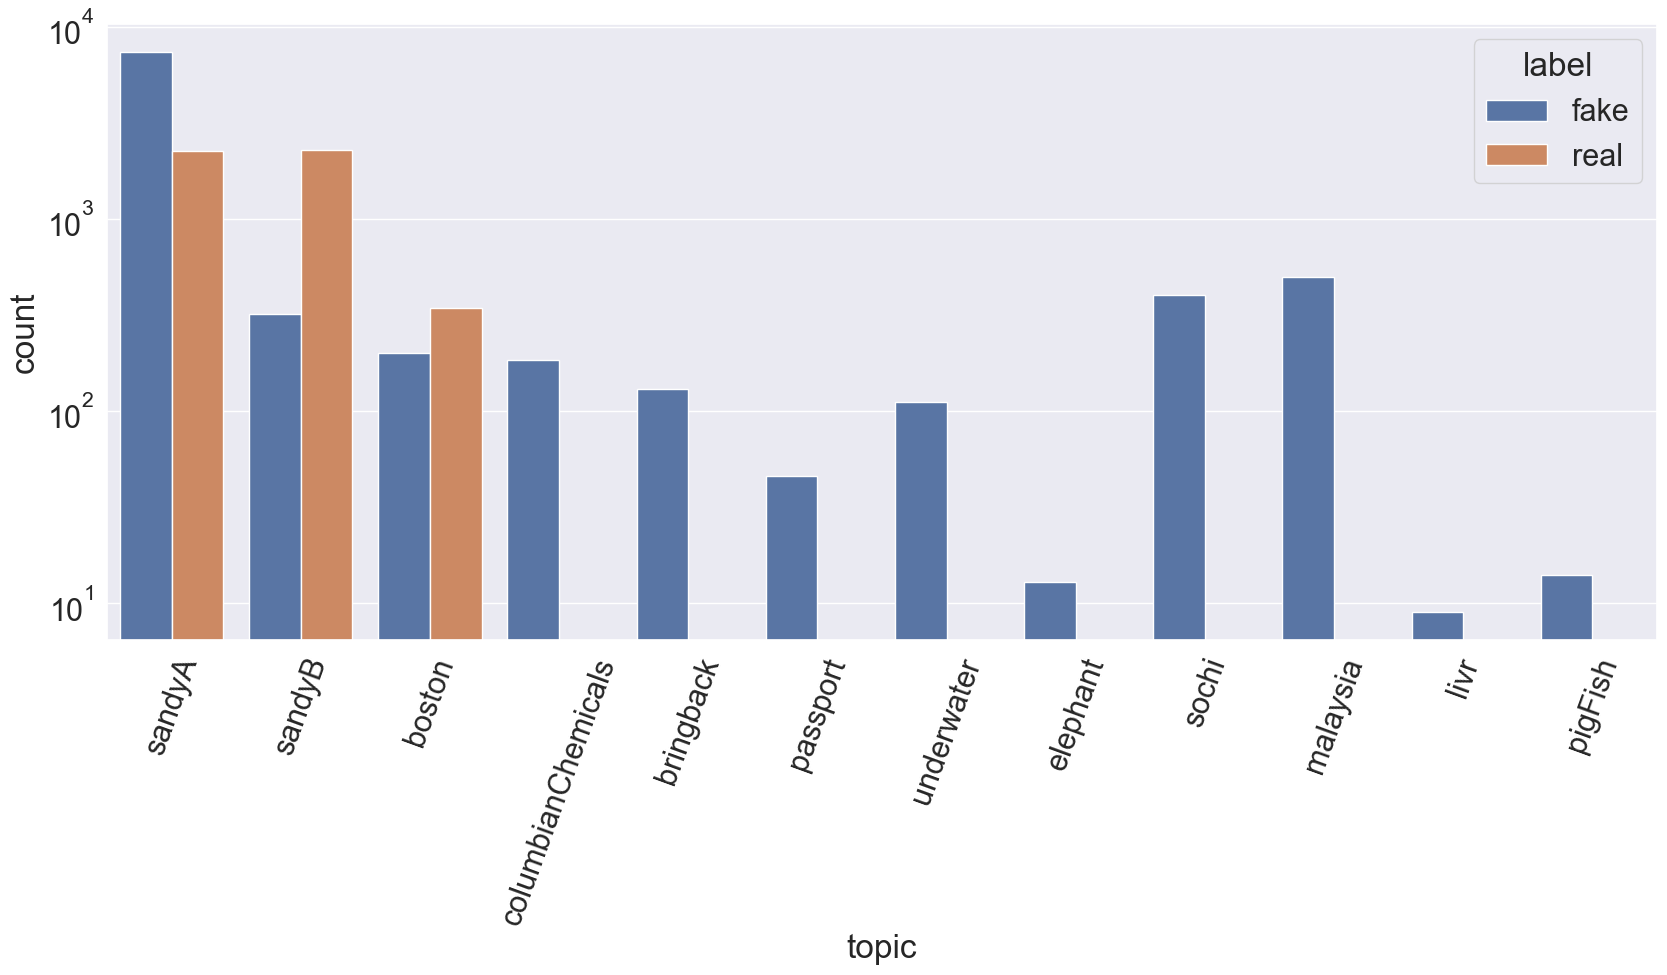

In [64]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big

ax = sns.countplot(x="topic", hue="label", data=trainTweets)
# Draw a nested barplot by species and sex
ax.set_yscale("log")
plt.xticks(rotation=70)
plt.show()